In [2]:
import numpy as np 
import pandas as pd

import os
dir_black = os.path.join('../Black Soil')
dir_Laterite = os.path.join('../Laterite Soil')
dir_peat = os.path.join('../Peat Soil')
dir_yellow = os.path.join('../Yellow Soil')

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
image_size = 220
batch_size = 10


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=True,
                                   rotation_range=50,
                                   rescale=1/255,
                                   validation_split=0.2)


train_generator = train_datagen.flow_from_directory(
        '', 
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical',subset='training')

validation_generator = train_datagen.flow_from_directory(
        '', 
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical',subset='validation')


Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [9]:
import PIL
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [10]:
print (train_generator.class_indices)

{'Black Soil': 0, 'Laterite Soil': 1, 'Peat Soil': 2, 'Yellow Soil': 3}


In [128]:
model = tf.keras.models.Sequential([
    
    # 1st convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 2nd convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 3rd convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 4th convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 5th convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 6th convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 256 neuron in the fully-connected layer
    tf.keras.layers.Dense(256, activation='relu'),
    # 4 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(4, activation='softmax')
])

In [129]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_158 (Conv2D)         (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d_158 (MaxPooli  (None, 109, 109, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_159 (Conv2D)         (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_159 (MaxPooli  (None, 53, 53, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_160 (Conv2D)         (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_160 (MaxPooli  (None, 25, 25, 64)     

In [130]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [131]:
history = model.fit(
        train_generator, 
        steps_per_epoch = int(train_generator.samples/batch_size),  
        validation_data = validation_generator,
        validation_steps = int(validation_generator.samples/batch_size),
        epochs =40,
        verbose = 1,
        )

Epoch 1/40
32/32 [==============================] - 28s 814ms/step - loss: 1.1905 - accuracy: 0.3844 - val_loss: 0.8022 - val_accuracy: 0.5625
Epoch 2/40
32/32 [==============================] - 27s 824ms/step - loss: 0.8948 - accuracy: 0.4844 - val_loss: 0.7170 - val_accuracy: 0.6875
Epoch 3/40
32/32 [==============================] - 31s 955ms/step - loss: 0.8752 - accuracy: 0.5750 - val_loss: 1.2805 - val_accuracy: 0.6000
Epoch 4/40
32/32 [==============================] - 25s 761ms/step - loss: 0.7650 - accuracy: 0.6250 - val_loss: 0.6263 - val_accuracy: 0.6500
Epoch 5/40
32/32 [==============================] - 23s 720ms/step - loss: 0.7174 - accuracy: 0.6875 - val_loss: 0.5843 - val_accuracy: 0.7125
Epoch 6/40
32/32 [==============================] - 23s 718ms/step - loss: 0.6201 - accuracy: 0.7375 - val_loss: 0.5642 - val_accuracy: 0.7875
Epoch 7/40
32/32 [==============================] - 23s 713ms/step - loss: 0.6416 - accuracy: 0.7094 - val_loss: 0.6381 - val_accuracy: 0.7500

In [132]:
import matplotlib.pyplot as plt


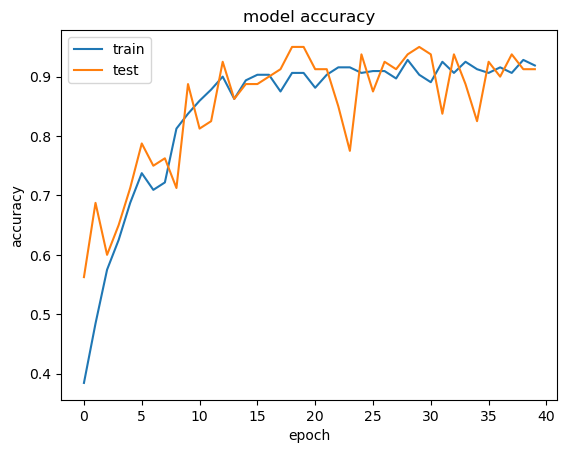

In [142]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('modelAccuracy')

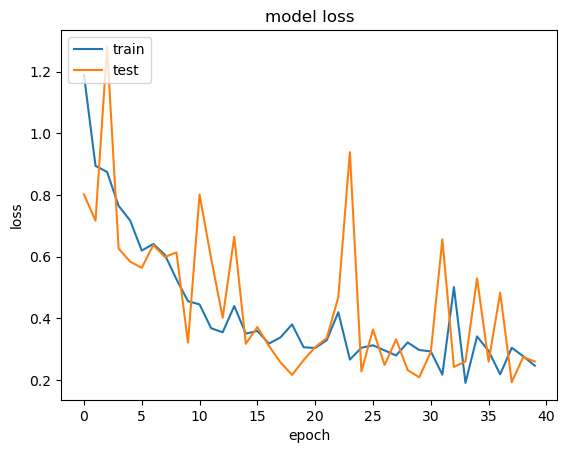

In [141]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('modelLoss.png')

In [143]:
model.save('SoilPredictorFinal.h5')

In [144]:
model.evaluate(validation_generator)

8/8 [==============================] - 3s 300ms/step - loss: 0.2510 - accuracy: 0.9250


[0.2509802579879761, 0.925000011920929]